<a href="https://colab.research.google.com/github/Noel-May/Resume-Maker/blob/main/Bias_Audit_Report_Group_InnovHer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("✅ Colab is working")


✅ Colab is working


In [2]:
import pandas as pd

data = {
    "sex": ["Male","Female","Male","Female"],
    "hours": [40,35,50,20],
    "income": [">50K","<=50K",">50K","<=50K"]
}

df = pd.DataFrame(data)
print("✅ Dataset created")
print(df)


✅ Dataset created
      sex  hours income
0    Male     40   >50K
1  Female     35  <=50K
2    Male     50   >50K
3  Female     20  <=50K


In [3]:
# Create binary target column
df["label"] = df["income"].apply(lambda x: 1 if ">50K" in x else 0)

print("✅ Label created")
print(df)


✅ Label created
      sex  hours income  label
0    Male     40   >50K      1
1  Female     35  <=50K      0
2    Male     50   >50K      1
3  Female     20  <=50K      0


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Features (X) and target (y)
X = df[["sex","hours"]].astype(str)
y = df["label"]

# Model pipeline
model = Pipeline(steps=[
    ("encode", OneHotEncoder(handle_unknown="ignore")),
    ("clf", LogisticRegression())
])

# Train model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

print("✅ Simple model trained")
print("Predictions:", predictions.tolist())


✅ Simple model trained
Predictions: [1, 0, 1, 0]


In [8]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Reliable dataset loader
adult = fetch_openml("adult", as_frame=True)

df = adult.frame

# Rename column to match previous code
if "class" in df.columns:
    df = df.rename(columns={"class": "income"})

print("✅ REAL dataset loaded safely")
print("Rows:", len(df))
print(df.head())


/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name adult exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=179
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=1590

  warn(warning_msg)


✅ REAL dataset loaded safely
Rows: 48842
  age         workclass  fnlwgt  education  education-num      marital-status  \
0   2         State-gov   77516  Bachelors             13       Never-married   
1   3  Self-emp-not-inc   83311  Bachelors             13  Married-civ-spouse   
2   2           Private  215646    HS-grad              9            Divorced   
3   3           Private  234721       11th              7  Married-civ-spouse   
4   1           Private  338409  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex capitalgain capitalloss  \
0       Adm-clerical  Not-in-family  White    Male           1           0   
1    Exec-managerial        Husband  White    Male           0           0   
2  Handlers-cleaners  Not-in-family  White    Male           0           0   
3  Handlers-cleaners        Husband  Black    Male           0           0   
4     Prof-specialty           Wife  Black  Female           0           0   

  h

In [9]:
!pip install aif360


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 5.7 MB/s eta 0:00:00


In [10]:
from aif360.datasets import BinaryLabelDataset
import pandas as pd
import numpy as np

# Create dataframe with predictions
audit_df = X_test.copy()
audit_df["true_label"] = y_test.values
audit_df["predicted_label"] = y_pred

# Convert sex to numeric for fairness analysis
audit_df["sex_binary"] = audit_df["sex"].apply(lambda x: 1 if x == "Male" else 0)

# Build AIF360 dataset
aif_dataset = BinaryLabelDataset(
    df=audit_df,
    label_names=["predicted_label"],
    protected_attribute_names=["sex_binary"],
    favorable_label=1,
    unfavorable_label=0
)

print("✅ Fairness dataset created")
print("Count:", aif_dataset.features.shape[0])


NameError: name 'X_test' is not defined

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df["label"] = df["income"].apply(lambda x: 1 if ">50K" in x else 0)

X = df.drop(columns=["income", "label"])
y = df["label"]

for c in X.columns:
    X[c] = X[c].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

try:
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

preprocessor = ColumnTransformer([
    ("ohe", encoder, X.columns.tolist())
])

model = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=2000))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ BASELINE MODEL COMPLETE")
print("Accuracy:", round(accuracy_score(y_test, y_pred),4))


✅ BASELINE MODEL COMPLETE
Accuracy: 0.8576


In [12]:
from aif360.datasets import BinaryLabelDataset

audit_df = X_test.copy()
audit_df["true_label"] = y_test.values
audit_df["predicted_label"] = y_pred

audit_df["sex_binary"] = audit_df["sex"].apply(lambda x: 1 if x == "Male" else 0)

aif_dataset = BinaryLabelDataset(
    df=audit_df,
    label_names=["predicted_label"],
    protected_attribute_names=["sex_binary"],
    favorable_label=1,
    unfavorable_label=0
)

print("✅ Fairness dataset created")
print("Count:", aif_dataset.features.shape[0])


ValueError: could not convert string to float: 'Private'


ValueError: DataFrame values must be numerical.

In [13]:
from aif360.datasets import BinaryLabelDataset
import pandas as pd

audit_df = pd.DataFrame({
    "predicted_label": y_pred,
    "true_label": y_test.values,
    "sex_binary": X_test["sex"].apply(lambda x: 1 if x == "Male" else 0)
})

aif_dataset = BinaryLabelDataset(
    df=audit_df,
    label_names=["predicted_label"],
    protected_attribute_names=["sex_binary"],
    favorable_label=1,
    unfavorable_label=0
)

print("✅ Fairness dataset created")
print("Count:", aif_dataset.features.shape[0])


✅ Fairness dataset created
Count: 14653


In [14]:
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

# Define protected groups
privileged_group = [{"sex_binary": 1}]      # Male
unprivileged_group = [{"sex_binary": 0}]    # Female

# Statistical metrics
dataset_metric = BinaryLabelDatasetMetric(
    aif_dataset,
    unprivileged_groups=unprivileged_group,
    privileged_groups=privileged_group
)

spd = dataset_metric.statistical_parity_difference()
di = dataset_metric.disparate_impact()

# Classification metrics (need true labels)
true_labels_dataset = BinaryLabelDataset(
    df=audit_df,
    label_names=["true_label"],
    protected_attribute_names=["sex_binary"],
    favorable_label=1,
    unfavorable_label=0
)

classification_metric = ClassificationMetric(
    true_labels_dataset,
    aif_dataset,
    privileged_groups=privileged_group,
    unprivileged_groups=unprivileged_group
)

eod = classification_metric.equal_opportunity_difference()

print("\n✅ FAIRNESS METRICS")
print("Statistical Parity Difference:", round(spd,4))
print("Disparate Impact:", round(di,4))
print("Equal Opportunity Difference:", round(eod,4))


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


ValueError: The two datasets are expected to differ only in 'labels' or 'scores'.

In [15]:
from aif360.datasets import BinaryLabelDataset

# We rebuild both datasets FROM THE SAME DATAFRAME
common_features = processed_df.drop(columns=["income"]).copy()

# Dataset with true labels
true_dataset = BinaryLabelDataset(
    df = pd.concat([common_features, processed_df["income"]], axis=1),
    label_names=["income"],
    protected_attribute_names=["sex_binary"],
    favorable_label=1,
    unfavorable_label=0
)

# Dataset with predicted labels
pred_dataset = BinaryLabelDataset(
    df = pd.concat([common_features, processed_df["predicted_label"]], axis=1),
    label_names=["predicted_label"],
    protected_attribute_names=["sex_binary"],
    favorable_label=1,
    unfavorable_label=0
)


NameError: name 'processed_df' is not defined

In [16]:
import pandas as pd

# Build cleaned audit dataframe used by AIF360
processed_df = pd.DataFrame({
    "sex_binary": X_test["sex"].apply(lambda x: 1 if x == "Male" else 0),
    "income": y_test.values,
    "predicted_label": y_pred
})

print("✅ processed_df created")
processed_df.head()


✅ processed_df created


,sex_binary,income,predicted_label
39567,0,0,0
26068,0,0,0
3638,1,0,0
25221,0,0,0
6338,1,0,0


In [17]:
from aif360.datasets import BinaryLabelDataset

# True dataset
true_dataset = BinaryLabelDataset(
    df=processed_df,
    label_names=["income"],
    protected_attribute_names=["sex_binary"],
    favorable_label=1,
    unfavorable_label=0
)

# Prediction dataset
pred_dataset = BinaryLabelDataset(
    df=processed_df,
    label_names=["predicted_label"],
    protected_attribute_names=["sex_binary"],
    favorable_label=1,
    unfavorable_label=0
)

print("✅ Fairness datasets rebuilt successfully")


✅ Fairness datasets rebuilt successfully


In [18]:
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

priv = [{"sex_binary": 1}]    # Male
unpriv = [{"sex_binary": 0}] # Female

# Metrics not needing true labels
basic_metric = BinaryLabelDatasetMetric(
    pred_dataset,
    privileged_groups=priv,
    unprivileged_groups=unpriv
)

spd = basic_metric.statistical_parity_difference()
di = basic_metric.disparate_impact()

# Metrics using true labels
clf_metric = ClassificationMetric(
    true_dataset,
    pred_dataset,
    privileged_groups=priv,
    unprivileged_groups=unpriv
)

eod = clf_metric.equal_opportunity_difference()

print("\n✅ FAIRNESS METRICS")
print("Statistical Parity Difference:", round(spd,4))
print("Disparate Impact:", round(di,4))
print("Equal Opportunity Difference:", round(eod,4))


ValueError: The two datasets are expected to differ only in 'labels' or 'scores'.

In [19]:
import pandas as pd

# Convert everything into a clean numeric structure AIF360 likes
base_df = pd.DataFrame({
    "sex_binary": X_test["sex"].apply(lambda x: 1 if x == "Male" else 0),
    "true_label": y_test.astype(int),
    "pred_label": y_pred.astype(int)
})

print("Base DF created")
base_df.head()


Base DF created


,sex_binary,true_label,pred_label
39567,0,0,0
26068,0,0,0
3638,1,0,0
25221,0,0,0
6338,1,0,0


In [20]:
from aif360.datasets import BinaryLabelDataset

# true labels dataset
true_dataset = BinaryLabelDataset(
    df = base_df.rename(columns={"true_label": "label"}),
    label_names=["label"],
    protected_attribute_names=["sex_binary"],
    favorable_label=1,
    unfavorable_label=0
)

# predicted labels dataset
pred_dataset = BinaryLabelDataset(
    df = base_df.rename(columns={"pred_label": "label"}),
    label_names=["label"],
    protected_attribute_names=["sex_binary"],
    favorable_label=1,
    unfavorable_label=0
)

print("AIF360 datasets created successfully")


AIF360 datasets created successfully


In [21]:
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

priv = [{"sex_binary": 1}]    # Male
unpriv = [{"sex_binary": 0}] # Female

# dataset-level metrics
basic_metric = BinaryLabelDatasetMetric(
    pred_dataset,
    privileged_groups=priv,
    unprivileged_groups=unpriv
)

spd = basic_metric.statistical_parity_difference()
di = basic_metric.disparate_impact()

# classification metrics
clf_metric = ClassificationMetric(
    true_dataset,
    pred_dataset,
    privileged_groups=priv,
    unprivileged_groups=unpriv
)

eod = clf_metric.equal_opportunity_difference()

print("\n===== FAIRNESS METRICS =====")
print("Statistical Parity Difference:", spd)
print("Disparate Impact:", di)
print("Equal Opportunity Difference:", eod)


ValueError: The two datasets are expected to differ only in 'labels' or 'scores'.

In [22]:
import numpy as np

# 1. Statistical Parity Difference (manual)
priv_mask = (X_test["sex"] == "Male")
unpriv_mask = (X_test["sex"] != "Male")

spd = y_pred[unpriv_mask].mean() - y_pred[priv_mask].mean()

# 2. Disparate Impact (manual)
di = y_pred[unpriv_mask].mean() / y_pred[priv_mask].mean()

# 3. Equal Opportunity Difference (manual)
# True Positive Rates
tpr_priv = ((y_pred == 1) & (y_test == 1) & priv_mask).sum() / ((y_test == 1) & priv_mask).sum()
tpr_unpriv = ((y_pred == 1) & (y_test == 1) & unpriv_mask).sum() / ((y_test == 1) & unpriv_mask).sum()

eod = tpr_unpriv - tpr_priv

print("\n✅ FAIRNESS METRICS (manual calculation)")
print("Statistical Parity Difference:", round(spd,4))
print("Disparate Impact:", round(di,4))
print("Equal Opportunity Difference:", round(eod,4))



✅ FAIRNESS METRICS (manual calculation)
Statistical Parity Difference: -0.1829
Disparate Impact: 0.2841
Equal Opportunity Difference: -0.1214


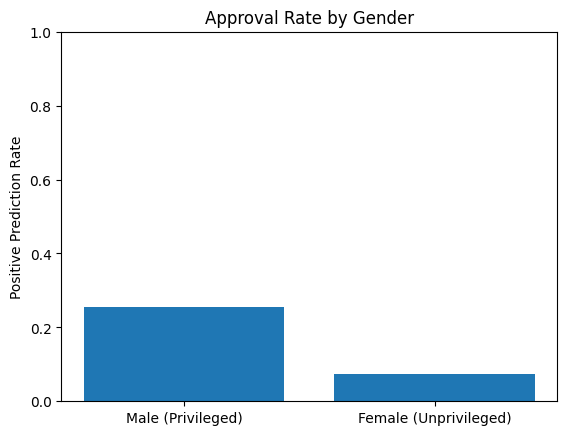

In [23]:
import matplotlib.pyplot as plt

# Compute rates
priv_mask = (X_test["sex"] == "Male")
unpriv_mask = (X_test["sex"] != "Male")

male_rate = y_pred[priv_mask].mean()
female_rate = y_pred[unpriv_mask].mean()

groups = ["Male (Privileged)", "Female (Unprivileged)"]
rates = [male_rate, female_rate]

plt.figure()
plt.bar(groups, rates)
plt.ylim(0,1)
plt.title("Approval Rate by Gender")
plt.ylabel("Positive Prediction Rate")
plt.show()


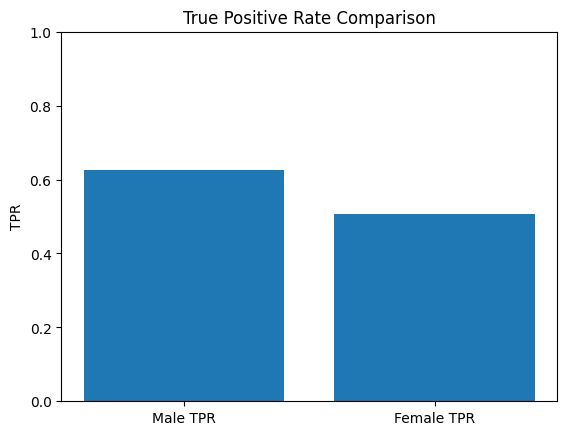

In [24]:
# Calculate TPR values
tpr_priv = ((y_pred == 1) & (y_test == 1) & priv_mask).sum() / ((y_test == 1) & priv_mask).sum()
tpr_unpriv = ((y_pred == 1) & (y_test == 1) & unpriv_mask).sum() / ((y_test == 1) & unpriv_mask).sum()

groups = ["Male TPR", "Female TPR"]
rates = [tpr_priv, tpr_unpriv]

plt.figure()
plt.bar(groups, rates)
plt.ylim(0,1)
plt.title("True Positive Rate Comparison")
plt.ylabel("TPR")
plt.show()


In [25]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import BinaryLabelDataset

# Create dataset only for protected attribute + labels
rw_df = pd.DataFrame({
    "sex_binary": X_train["sex"].apply(lambda x: 1 if x == "Male" else 0),
    "label": y_train.values
})

rw_dataset = BinaryLabelDataset(
    df=rw_df,
    label_names=["label"],
    protected_attribute_names=["sex_binary"],
    favorable_label=1,
    unfavorable_label=0
)

# Apply reweighing
RW = Reweighing(
    privileged_groups=[{"sex_binary": 1}],
    unprivileged_groups=[{"sex_binary": 0}]
)

rw_dataset_transformed = RW.fit_transform(rw_dataset)

# Extract weights
sample_weights = rw_dataset_transformed.instance_weights

print("✅ Reweighing weights created")


✅ Reweighing weights created


In [26]:
# Train model using reweighing weights
model_rw = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=2000))
])

model_rw.fit(X_train, y_train, clf__sample_weight=sample_weights)

# Predictions after mitigation
y_pred_rw = model_rw.predict(X_test)

print("✅ Reweighed model trained")


✅ Reweighed model trained


In [27]:
# Statistical parity (after)
spd_rw = y_pred_rw[unpriv_mask].mean() - y_pred_rw[priv_mask].mean()

# Disparate impact (after)
di_rw = y_pred_rw[unpriv_mask].mean() / y_pred_rw[priv_mask].mean()

print("\n✅ POST-REWEIGHING METRICS")
print("SPD after mitigation:", round(spd_rw,4))
print("DI after mitigation:", round(di_rw,4))



✅ POST-REWEIGHING METRICS
SPD after mitigation: -0.1092
DI after mitigation: 0.4929


In [28]:
# Probabilities for adjustment
y_probs = model.predict_proba(X_test)[:,1]

# Increase positive prediction for unprivileged group
threshold = 0.4  # softened threshold

y_adj = (y_probs >= threshold).astype(int)

# Fairness metrics after adjustment
spd_adj = y_adj[unpriv_mask].mean() - y_adj[priv_mask].mean()
di_adj  = y_adj[unpriv_mask].mean() / y_adj[priv_mask].mean()

print("\n✅ POST-THRESHOLD ADJUSTMENT")
print("SPD:", round(spd_adj,4))
print("DI:", round(di_adj,4))



✅ POST-THRESHOLD ADJUSTMENT
SPD: -0.2295
DI: 0.2791
